In [9]:
import ffn as fin
import pandas as pd
import math as m

In [2]:
prices = fin.get('QQQ',start = '2008-01-01').dropna().rebase()

[*********************100%%**********************]  1 of 1 completed


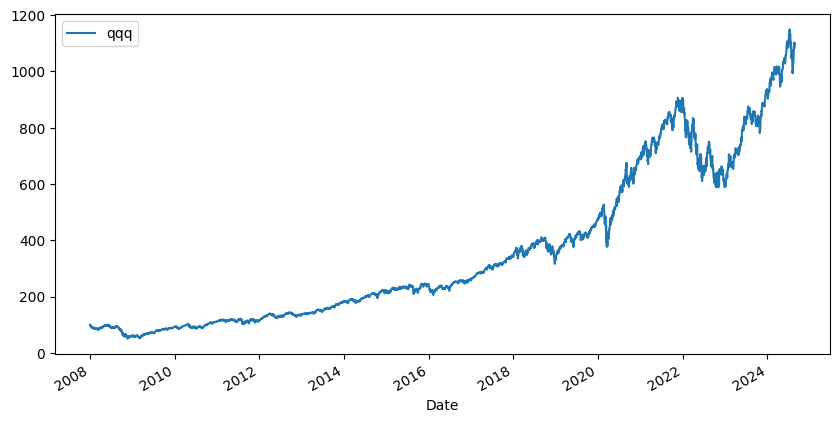

In [3]:
ax = prices.plot(figsize = (10,5))

In [4]:
reQQQ = prices.to_returns().dropna()


In [5]:
reQQQ.head()

,qqq
Date,
2008-01-03,0.004166
2008-01-04,-0.043856
2008-01-07,-0.004752
2008-01-08,-0.025950
2008-01-09,0.021313


In [ ]:
re36O = pd.read_csv('/home/al/inet/36one_serialized_returns.csv',delimiter=' ')

In [41]:
re36Odf = pd.DataFrame(re36O)
re36Odf

,Date,36O
0,2006-04-01,0.0127
1,2006-05-01,0.0002
2,2006-06-01,0.0144
3,2006-07-01,0.0240
4,2006-08-01,0.0335
...,...,...
214,2024-02-01,0.0113
215,2024-03-01,0.0176
216,2024-04-01,0.0133
217,2024-05-01,0.0122


In [35]:
idx = re36Odf["Date"]
re36Odf["Date"].drop()
re36Odf

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

,Date,36O
Date,,
2006-04-01,NaT,NaN
2006-05-01,NaT,NaN
2006-06-01,NaT,NaN
2006-07-01,NaT,NaN
2006-08-01,NaT,NaN
...,...,...
2024-02-01,NaT,NaN
2024-03-01,NaT,NaN
2024-04-01,NaT,NaN


In [ ]:
pi36O = re36O.to_price_index()
piQQQ = reQQQ.to_price_index()
pi36O

In [ ]:
[,lgkgggbbbreQQQ.hist(figsize=(10,5))
re36O.hist(figsize=(10,5))

In [ ]:
prices.calc_stats().display()

In [ ]:
log_prices = prices.map(math.log)

In [ ]:
log_prices.plot()

In [ ]:
log_prices.calc_stats().display()